<a href="https://colab.research.google.com/github/Fis428/PC03/blob/main/EX03_06_%E5%87%BA%E7%94%9F%E4%BA%BA%E5%8F%A3%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -O births.xls https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls


--2025-05-13 07:53:11--  https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297984 (291K) [application/octet-stream]
Saving to: ‘births.xls’

births.xls          100%[===================>] 291.00K  1.62MB/s    in 0.2s    

2025-05-13 07:53:11 (1.62 MB/s) - ‘births.xls’ saved [297984/297984]



In [12]:
import pandas as pd

url = 'https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls'
excel_data = pd.ExcelFile(url)

area = ['新北市','臺北市','桃園市','臺中市','臺南市','高雄市']
year = [str(i) for i in range(112, 98, -1)] # 從99年開始縣市合併

df = pd.DataFrame()
for sheet_name in excel_data.sheet_names:
    if sheet_name in year:
        df_yr = pd.read_excel(excel_data, sheet_name=sheet_name, header=4)
        df_yr = df_yr.iloc[:,0:2] # 只留前二欄，縣市及出生人口數
        df_yr.iloc[:, 0] = df_yr.iloc[:, 0].str.replace("　", "") # 去除早期資料中縣市名稱中間有空白
        df_yr.columns = ['county','births']
        df_yr = df_yr[df_yr['county'].isin(area)] # 篩選只留下六都的資料
        # Check if df_yr is empty before assigning the year
        if not df_yr.empty:
            df_yr.loc[:, 'year'] = f'{sheet_name:>03}' # 補足99年度字為三位數
            df = pd.concat([df, df_yr], ignore_index=True)
df



,county,births,year
0,新北市,18157.0,112
1,臺北市,15920.0,112
2,桃園市,17662.0,112
3,臺中市,16813.0,112
4,臺南市,9241.0,112
5,高雄市,15589.0,112
6,新北市,21273.0,111
7,臺北市,14279.0,111
8,桃園市,17982.0,111
9,臺中市,17721.0,111


In [14]:
pvt1=pd.pivot_table(df,index='year',values='births',aggfunc='mean')
pvt1

,births
year,
103,24953.833333
104,25319.333333
105,24609.833333
106,23142.166667
107,21468.333333
108,20585.666667
109,18850.666667
110,18243.166667
111,16014.000000


<ipython-input-22-865a1083dec1>:16: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-865a1083dec1>:16: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-865a1083dec1>:16: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-865a1083dec1>:16: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-865a1083dec1>:16: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-865a1083dec1>:16: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-865a1083dec1>:16: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from

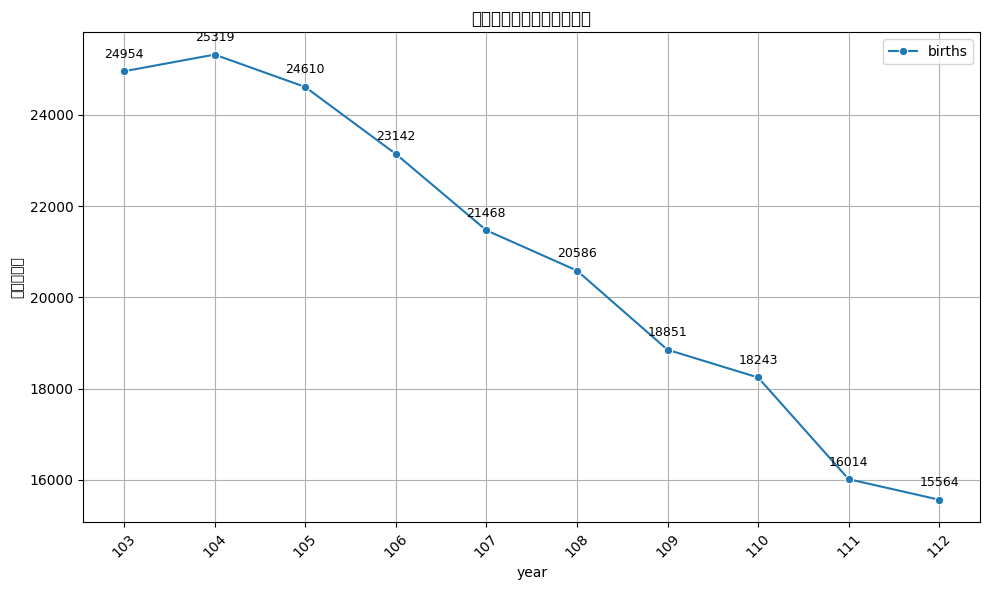

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(data=pvt1, marker='o')

# 加上數值標籤
for i, val in enumerate(pvt1['births']):
    plt.text(pvt1.index[i], val + 300, f"{val:.0f}", ha='center', fontsize=9)

plt.title("各年份出生數平均值折線圖")
plt.ylabel("出生數平均")
plt.xlabel("year")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-29-6e1d99058fa3>:10: UserWarning: Glyph 20845 (\N{CJK UNIFIED IDEOGRAPH-516D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-6e1d99058fa3>:10: UserWarning: Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-6e1d99058fa3>:10: UserWarning: Glyph 27511 (\N{CJK UNIFIED IDEOGRAPH-6B77}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-6e1d99058fa3>:10: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-6e1d99058fa3>:10: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-6e1d99058fa3>:10: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-6e1d99058fa3>:10: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from

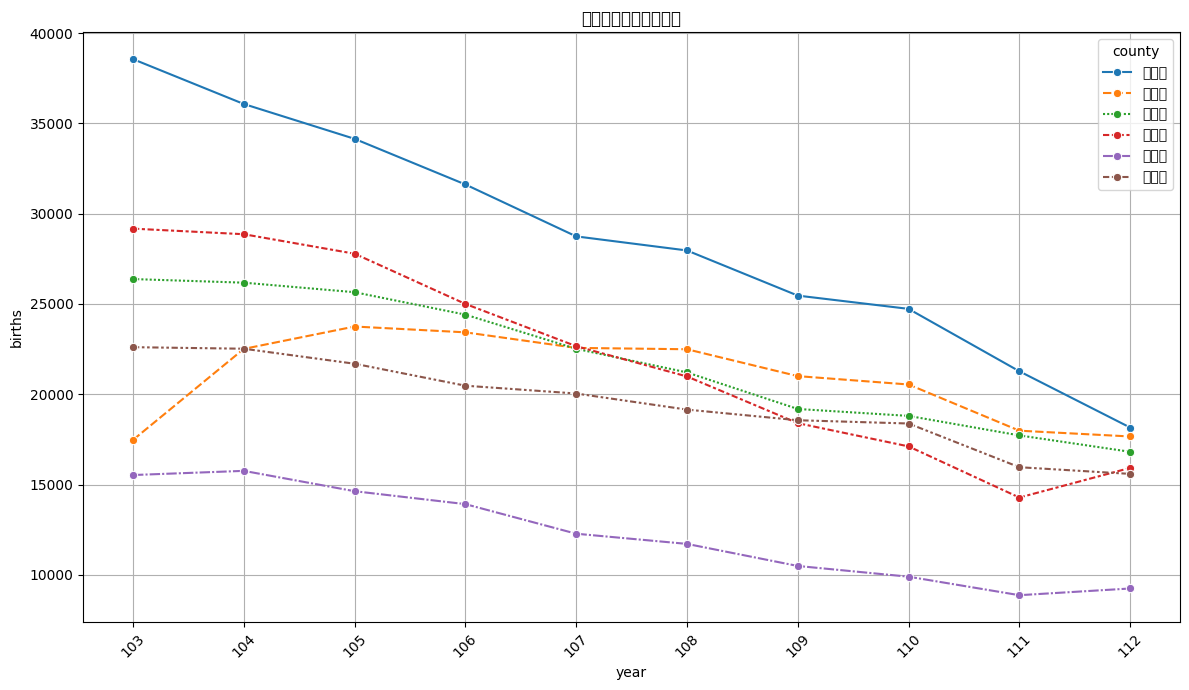

In [29]:
plt.figure(figsize=(12,7))
sns.lineplot(data=pvt2, marker='o')

plt.title("六都歷年出生數折線圖")
plt.ylabel("births")
plt.xlabel("year")
plt.xticks(rotation=45)
plt.legend(title="county")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas

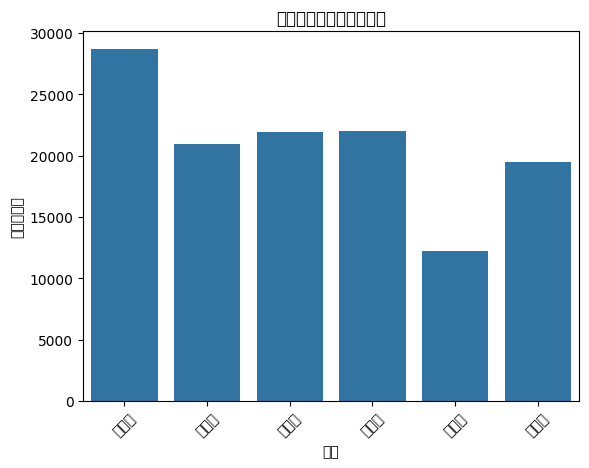

In [18]:
pvt3 = pd.pivot_table(df, index='county', values='births', aggfunc=['mean', 'max', 'min'])
pvt3

# 長條圖 - 平均出生數
sns.barplot(data=pvt3, x='county', y=('mean', 'births'))
plt.title("各縣市平均出生數長條圖")
plt.ylabel("平均出生數")
plt.xlabel("縣市")
plt.xticks(rotation=45)
plt.show()


<ipython-input-19-5c11b7288c56>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from fo

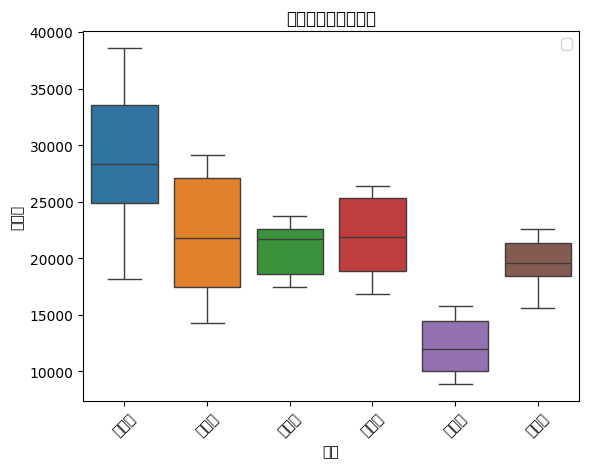

In [19]:
sns.boxplot(data=df, x='county', y='births', hue='county')
plt.title("各縣市出生數箱形圖")
plt.ylabel("出生數")
plt.xlabel("縣市")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()
